In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('week2.csv')

In [4]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_new,Month,Day_Perc_Change,Trend
0,INFY,EQ,15-May-2017,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017-05-15,May-2017,0.000000,Slight or No Change
1,INFY,EQ,16-May-2017,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017-05-16,May-2017,0.362566,Slight or No Change
2,INFY,EQ,17-May-2017,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017-05-17,May-2017,-0.230366,Slight or No Change
3,INFY,EQ,18-May-2017,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017-05-18,May-2017,0.939337,Slight Positive
4,INFY,EQ,19-May-2017,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017-05-19,May-2017,-0.395113,Slight or No Change


In [5]:
plt.style.use('fivethirtyeight')

In [7]:
data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Date_new                   object
Month                      object
Day_Perc_Change           float64
Trend                      object
dtype: object

In [8]:
data['Date']= pd.to_datetime(data['Date_new'])
data.drop('Date_new',inplace=True,axis=1)
data.index=data.Date

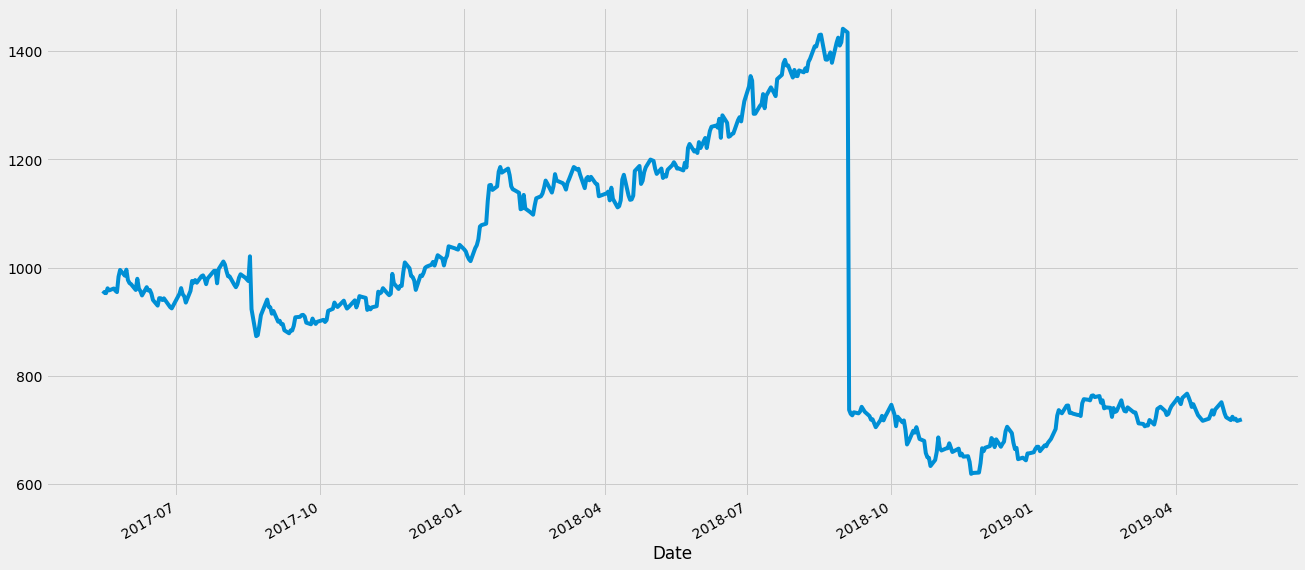

In [11]:
data['Close Price'].plot(figsize=(20,10))

<StemContainer object of 3 artists>

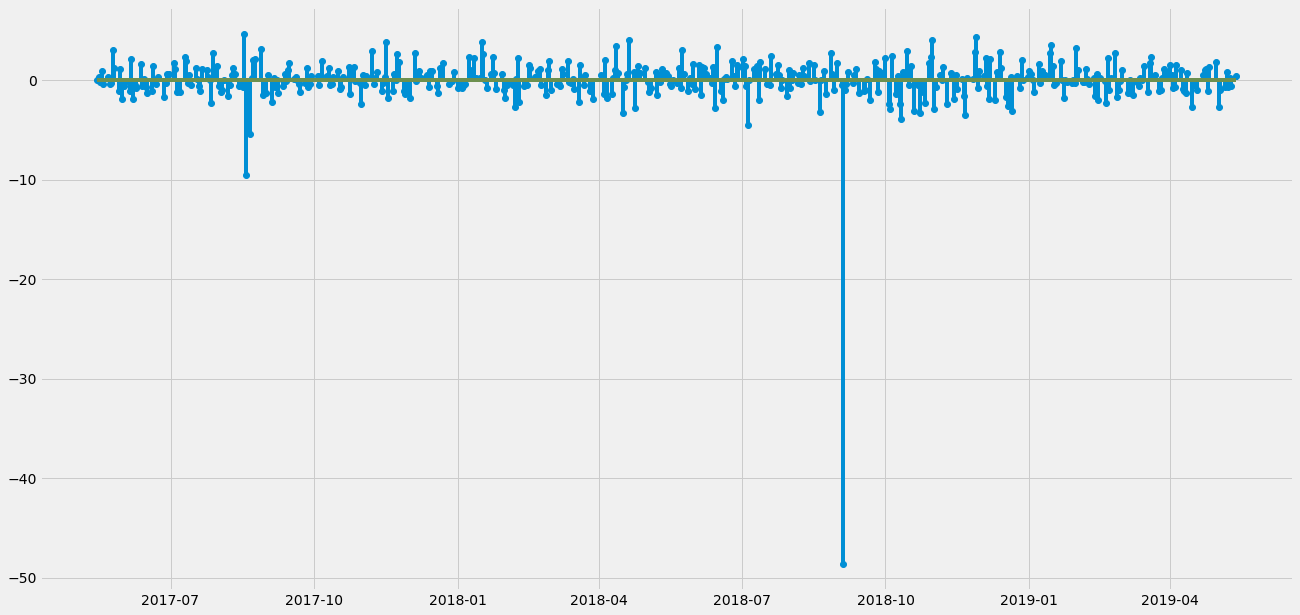

In [13]:
fig= plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

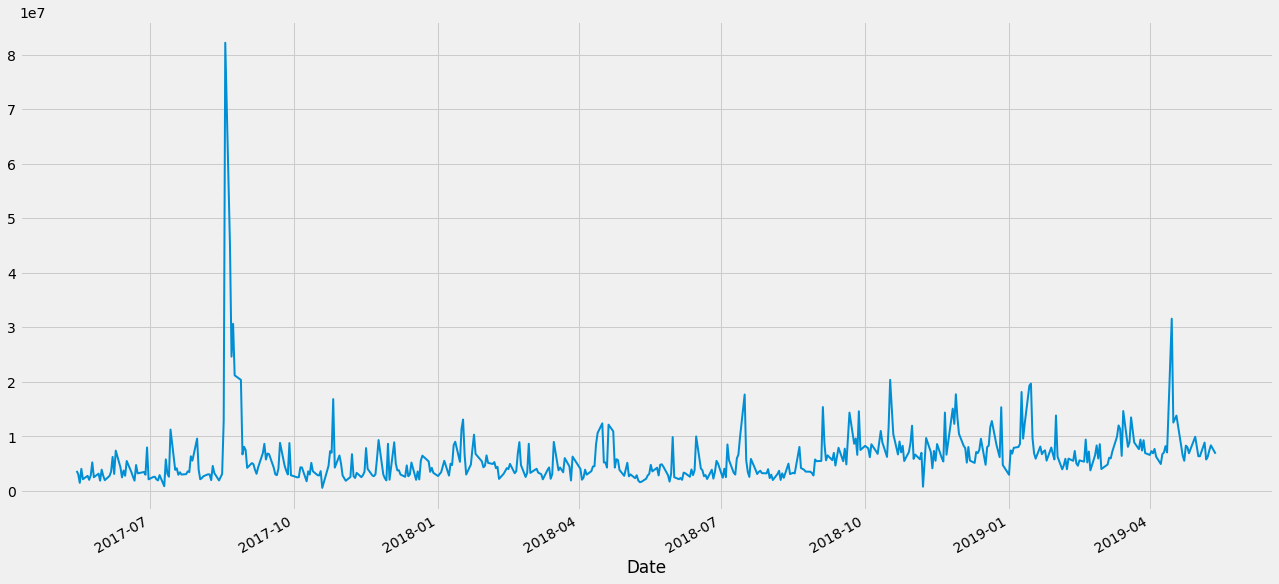

In [15]:
data['Total Traded Quantity'].plot(figsize=(20,10),lw=2)

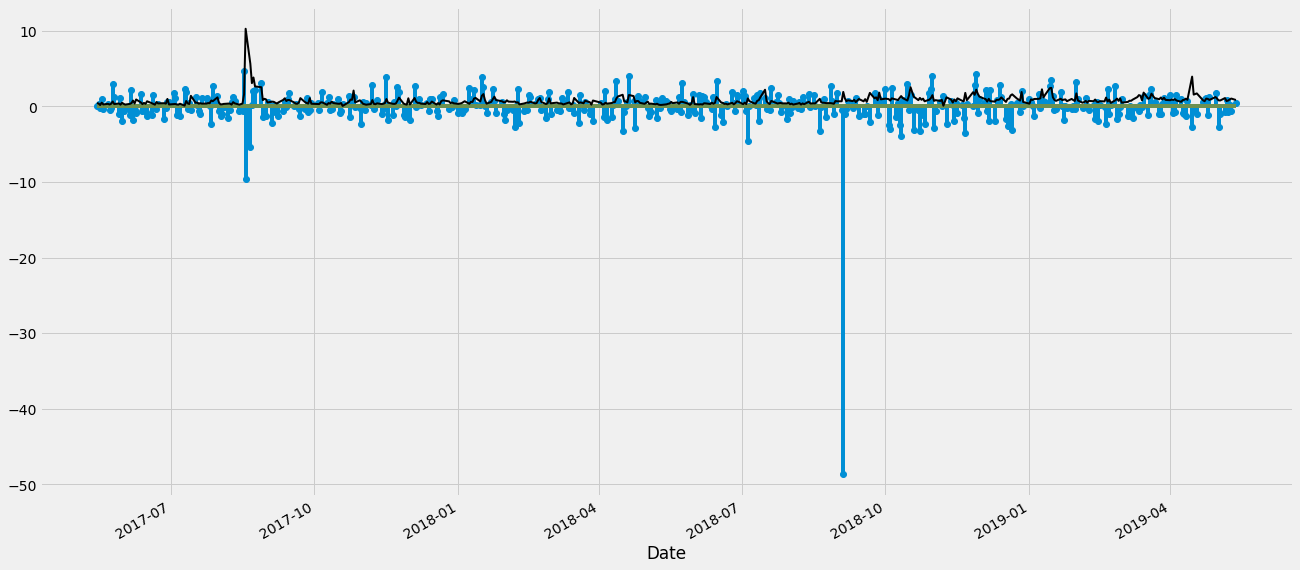

In [28]:
fig=plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
(data['Total Traded Quantity']/8000000).plot(figsize=(20,10),lw=2,c='k')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e4e0a58>],
      dtype=object)

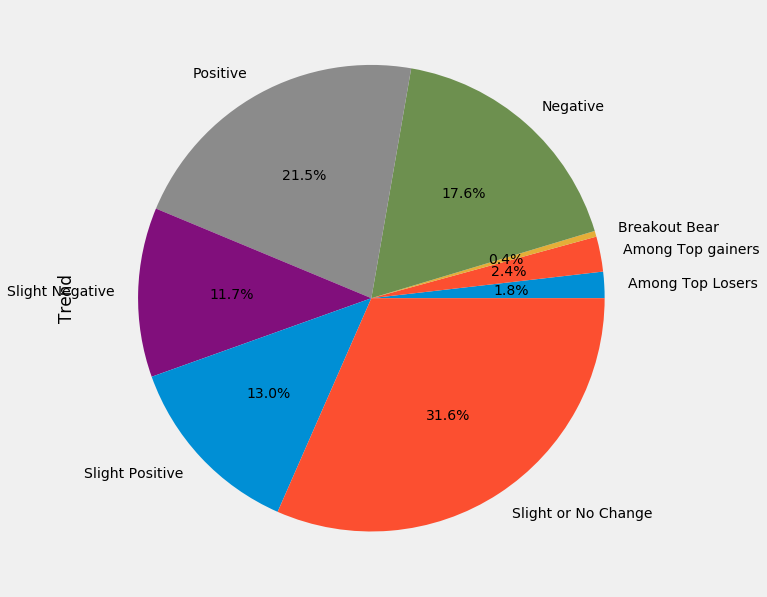

In [30]:
pie_data=data.groupby('Trend').Trend.count()
pie_data.plot.pie(subplots=True,figsize=(20,10),autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e5201d0>,
      dtype=object)

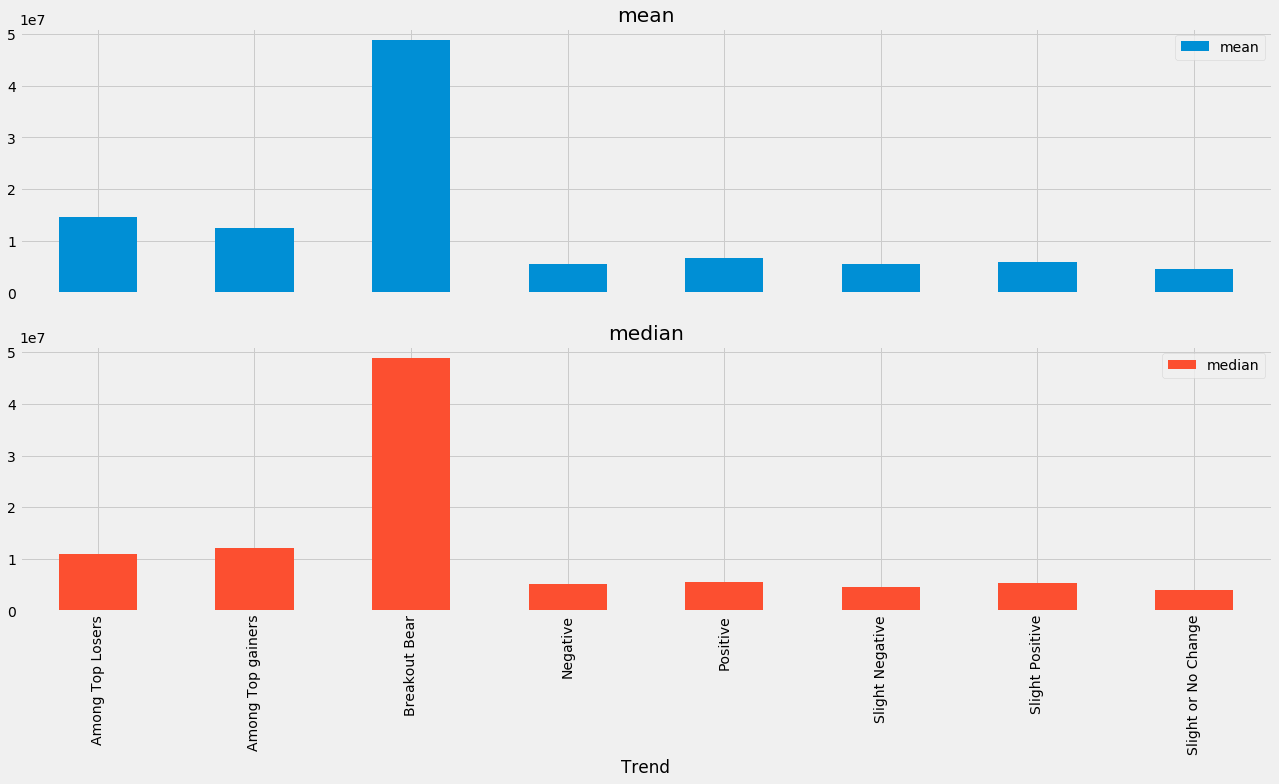

In [33]:
bar_data=data.groupby('Trend')['Total Traded Quantity'].agg(['mean','median'])
bar_data.plot.bar(subplots=True , figsize=(20,10))

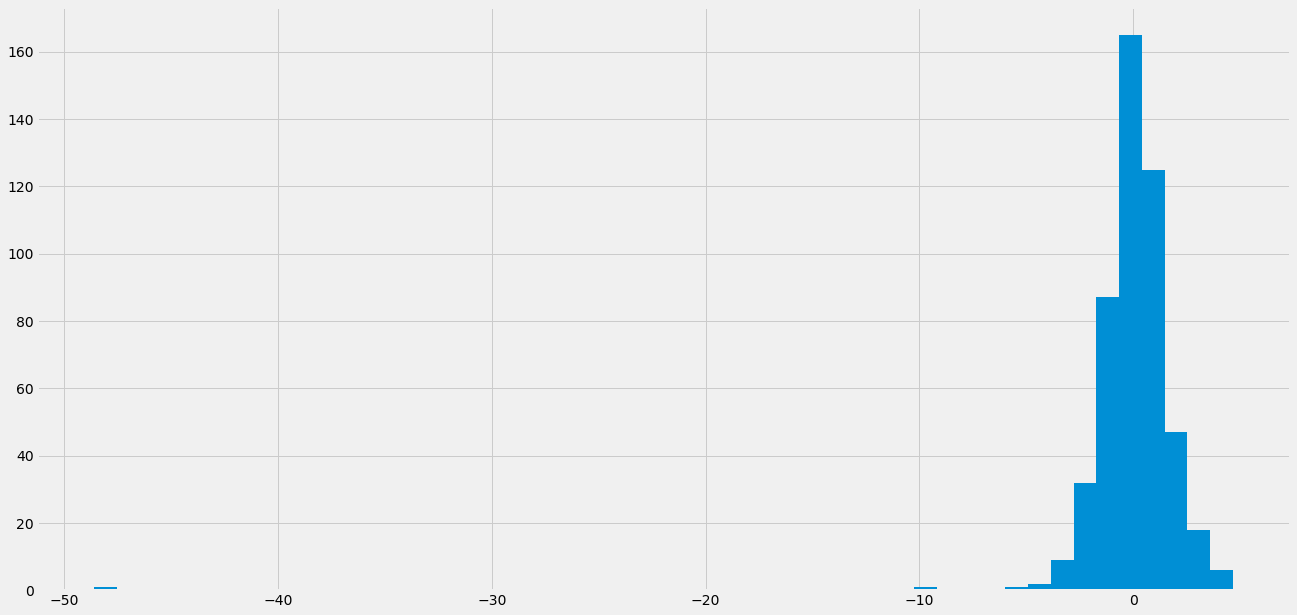

count    494.000000
mean      -0.009353
std        2.636733
min      -48.603800
25%       -0.717477
50%        0.075546
75%        0.967950
max        4.681091
Name: Day_Perc_Change, dtype: float64


In [34]:
data.Day_Perc_Change.hist(bins=50 , figsize =(20,10))

plt.show()
print(data.Day_Perc_Change.describe())

In [35]:
data1=pd.read_csv('CIPLA.csv')
data2=pd.read_csv('BAJFINANCE.csv')
data3=pd.read_csv('HDFCBANK.csv')
data4=pd.read_csv('MARUTI.csv')
data5=pd.read_csv('INFY.csv')
datai=pd.read_csv('NIFTY50.csv')

In [37]:
data1=data1[data1.Series=='EQ']
data1.reset_index(inplace = True, drop =True)
data2=data2[data2.Series=='EQ']
data2.reset_index(inplace = True, drop =True)
data3=data3[data3.Series=='EQ']
data3.reset_index(inplace = True, drop =True)
data4=data4[data4.Series=='EQ']
data4.reset_index(inplace = True, drop =True)
data5=data5[data5.Series=='EQ']
data5.reset_index(inplace = True, drop =True)

In [60]:
data1.head()


,CIPLA
0,569.00
1,565.60
2,562.35
3,560.10
4,564.95


In [62]:
data2.head()

,BAJFINANCE
0,1332.95
1,1347.75
2,1324.80
3,1314.55
4,1289.15


In [63]:
data3.head()

,HDFCBANK
0,1553.40
1,1559.65
2,1557.15
3,1557.10
4,1561.25


In [64]:
data4.head()

,MARUTI
0,6823.90
1,6953.95
2,6958.20
3,6831.05
4,6790.55


In [65]:
data5.head()

,INFY
0,951.55
1,955.00
2,952.80
3,961.75
4,957.95


In [70]:
datai=datai[['Close']]
datai.columns=['NIFTY']

In [71]:
compare=pd.concat([data1,data2,data3,data4,data5,datai],axis=1)

In [72]:
compare

,CIPLA,BAJFINANCE,HDFCBANK,MARUTI,INFY,NIFTY
0,569.00,1332.95,1553.40,6823.90,951.55,9445.40
1,565.60,1347.75,1559.65,6953.95,955.00,9512.25
2,562.35,1324.80,1557.15,6958.20,952.80,9525.75
3,560.10,1314.55,1557.10,6831.05,961.75,9429.45
4,564.95,1289.15,1561.25,6790.55,957.95,9427.90
5,563.10,1242.15,1576.00,6701.70,961.45,9438.25
6,533.20,1233.75,1569.10,6878.85,957.30,9386.15
7,519.65,1224.35,1566.75,6869.65,954.80,9360.55
8,504.00,1258.85,1617.15,6985.70,983.30,9509.75
9,488.90,1317.80,1626.00,7064.80,995.70,9595.10


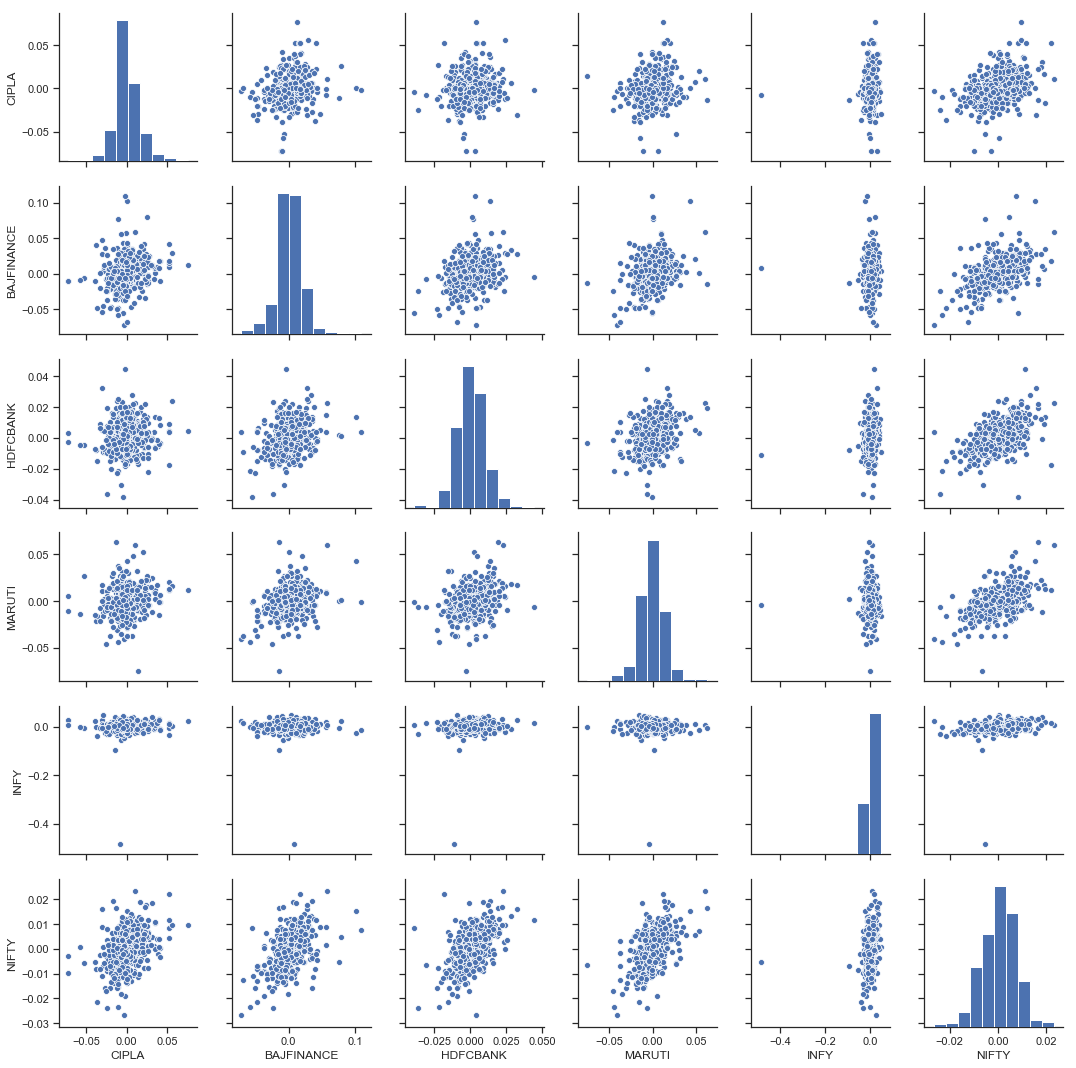

In [73]:
compare = compare.pct_change()
import seaborn as sns;sns.set(style='ticks',color_codes=True)
compare.replace([np.inf, -np.inf],np.nan)
compare.dropna(inplace=True,how='any',axis=0)
sns.pairplot(compare)

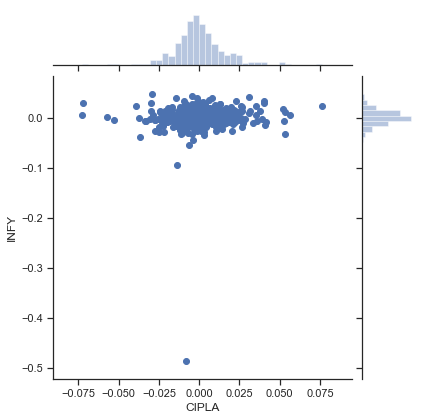

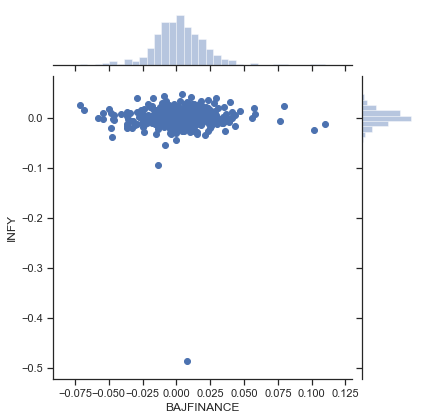

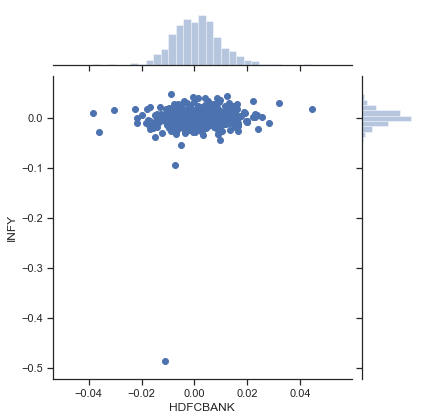

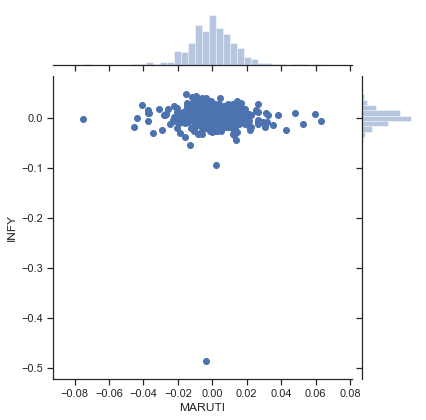

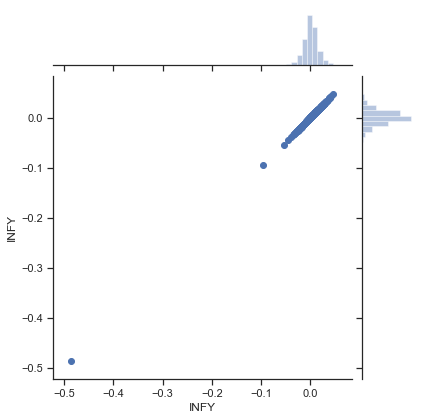

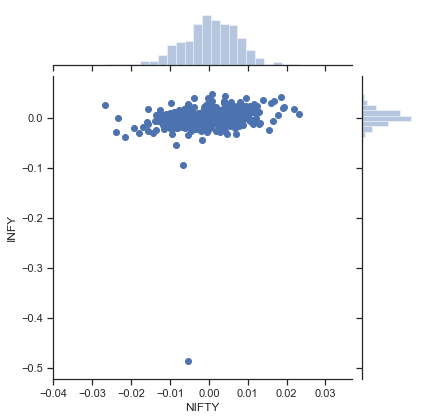

In [74]:
for i in compare.columns:
    sns.jointplot(i,'INFY',compare,kind='scatter')

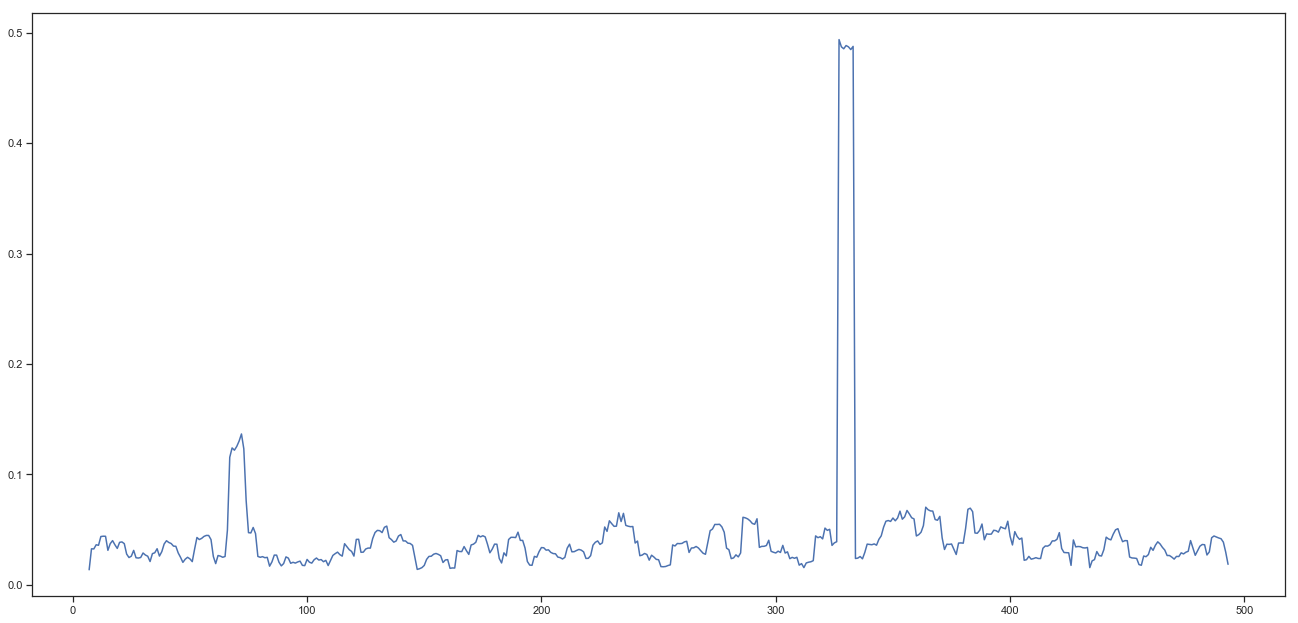

In [76]:
infy=compare['INFY'].rolling(7).std()*np.sqrt(7)
infy.plot(figsize=(20,10))
plt.show()

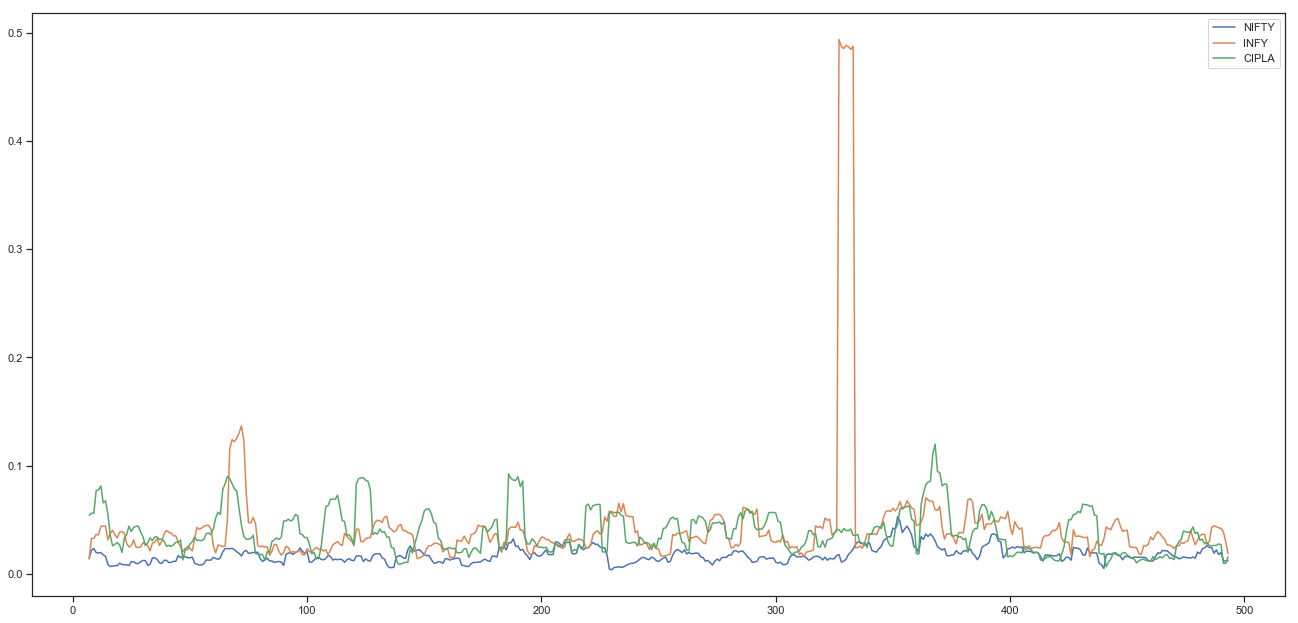

In [78]:
compare=compare[['NIFTY','INFY','CIPLA']]
vol = compare.rolling(7).std()*np.sqrt(7)

vol.plot(figsize=(20,10))

plt.show()

In [80]:
signals= pd.DataFrame(index=data.index)
signals['signal']=0.0

signals['21_SMA'] = data['Close Price'].rolling(window=21,min_periods=1).mean()

signals['34_SMA'] = data['Close Price'].rolling(window=34,min_periods=1).mean()

signals['signal'][21:] = np.where(signals['21_SMA'][21:]>signals['34_SMA'][21:],1.0,0.0)

signals['positions'] = signals['signal'].diff()

print(signals)

            signal      21_SMA      34_SMA  positions
Date                                                 
2017-05-15     0.0  951.550000  951.550000        NaN
2017-05-16     0.0  953.275000  953.275000        0.0
2017-05-17     0.0  953.116667  953.116667        0.0
2017-05-18     0.0  955.275000  955.275000        0.0
2017-05-19     0.0  955.810000  955.810000        0.0
2017-05-22     0.0  956.750000  956.750000        0.0
2017-05-23     0.0  956.828571  956.828571        0.0
2017-05-24     0.0  956.575000  956.575000        0.0
2017-05-25     0.0  959.544444  959.544444        0.0
2017-05-26     0.0  963.160000  963.160000        0.0
2017-05-29     0.0  965.159091  965.159091        0.0
2017-05-30     0.0  967.745833  967.745833        0.0
2017-05-31     0.0  968.461538  968.461538        0.0
2017-06-01     0.0  968.671429  968.671429        0.0
2017-06-02     0.0  968.723333  968.723333        0.0
2017-06-05     0.0  968.100000  968.100000        0.0
2017-06-06     0.0  968.7617

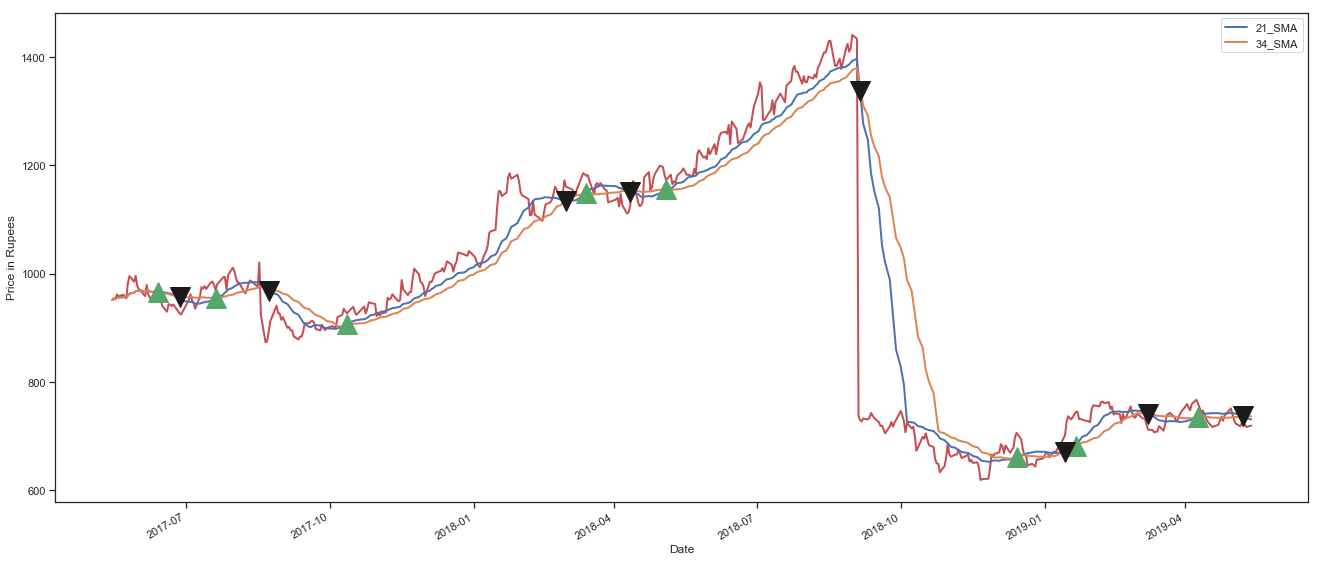

In [84]:
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(111,ylabel='Price in Rupees')

data['Close Price'].plot(ax=ax1,color='r',lw=2)

signals[['21_SMA','34_SMA']].plot(ax=ax1,lw=2)

ax1.plot(signals.loc[signals.positions==1.0].index, signals['21_SMA'][signals.positions==1.0],'^',markersize=20,color='g')

ax1.plot(signals.loc[signals.positions==-1.0].index, signals['21_SMA'][signals.positions==-1.0],'v',markersize=20,color='k')

plt.show()

In [85]:
def bbands(price, length=14,numsd=2):
    ave = price.rolling(length).mean()
    sd = price.rolling(length).std()
    upband = ave+(sd*numsd)
    dnband = ave-(sd*numsd)
    return np.round(ave,3), np.round(upband,3),np.round(dnband,3)

data['ave'],data['upper'],data['lower'] = bbands(data['Close Price'])

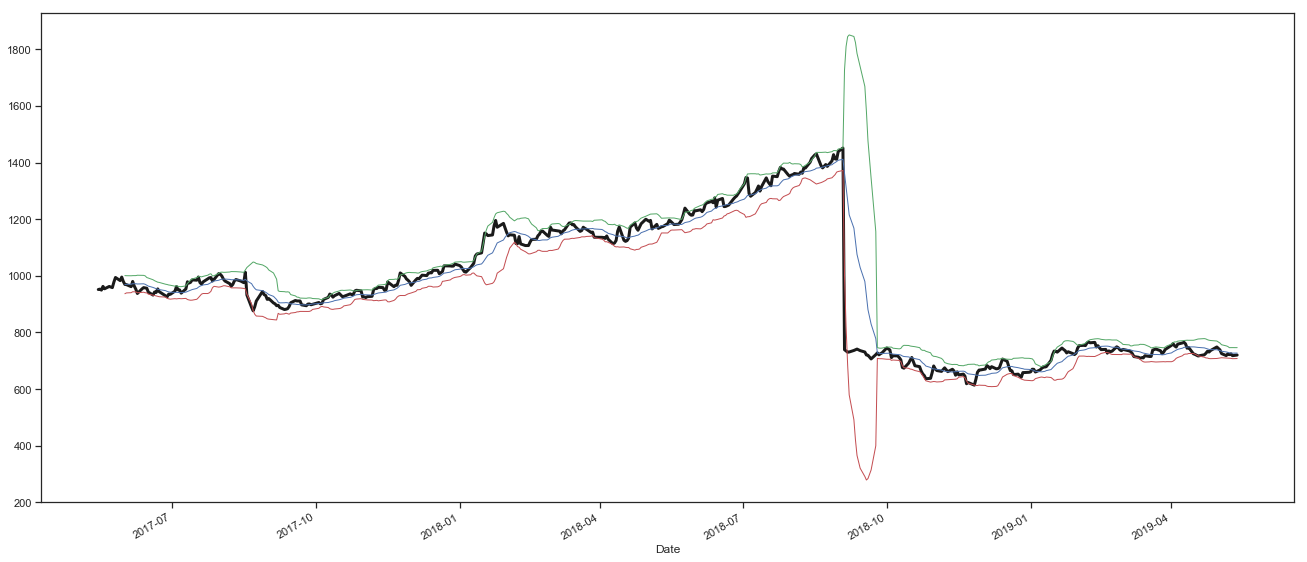

In [86]:
data['Average Price'].plot(c='k',figsize = (20,10),lw=3)
data['ave'].plot(c='b',figsize = (20,10),lw=1)
data['upper'].plot(c='g',figsize = (20,10),lw=1)
data['lower'].plot(c='r',figsize = (20,10),lw=1)

In [97]:
data.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Day_Perc_Change,Trend,ave,upper,lower
Date,,,,,,,,,,,,,,,,,,,,
2019-05-07,INFY,EQ,718.40,720.40,727.90,718.7,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,May-2019,0.856069,Slight Positive,729.811,750.387,709.234
2019-05-08,INFY,EQ,724.55,721.00,726.00,716.5,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,May-2019,-0.717687,Slight Negative,727.782,746.230,709.334
2019-05-09,INFY,EQ,719.35,719.15,730.30,715.8,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,May-2019,0.236324,Slight or No Change,727.321,746.119,708.524
2019-05-10,INFY,EQ,721.05,720.80,726.00,715.0,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,May-2019,-0.582484,Slight Negative,726.804,746.367,707.240
2019-05-13,INFY,EQ,716.85,716.55,726.45,712.1,718.00,719.70,720.09,6808993,4.903098e+09,201194,4745909,69.70,May-2019,0.397573,Slight or No Change,726.993,746.198,707.788


In [99]:
#data.drop('Date',axis=1,inplace=True)
data.to_csv('week3.csv')